# EDA on California Housing Data

### Getting and Setting Data

In [3]:
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz -O data/housing.tgz

--2020-10-20 23:42:49--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘data/housing.tgz’

data/housing.tgz    100%[===================>] 399.89K  7.78KB/s    in 56s     

2020-10-20 23:43:45 (7.18 KB/s) - ‘data/housing.tgz’ saved [409488/409488]



In [4]:
import tarfile

In [6]:
file=tarfile.open('data/housing.tgz')

In [7]:
file.extractall(path='data/')

In [9]:
!ls data
!rm data/housing.tgz
!ls data

housing.csv  housing.tgz
housing.csv


## Setting Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


seems ocean_proximity is only the object type and categorical

In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

seems total bedrooms has 207 null values

In [6]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


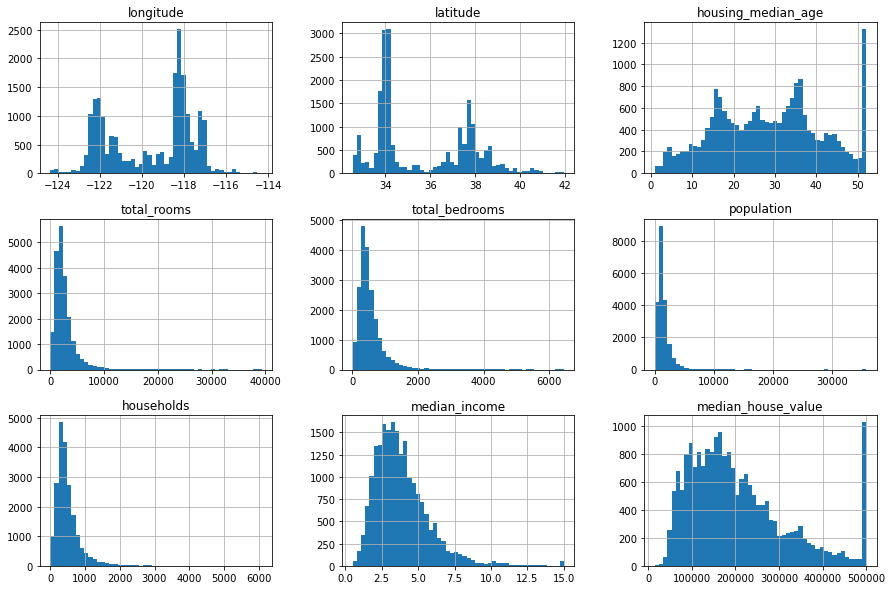

In [8]:
%matplotlib inline
data.hist(bins=50,figsize=(15,10));

In [9]:
from sklearn.model_selection import train_test_split 
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42) #randomly splitting data

In [10]:
len(train_data),len(test_data)

(16512, 4128)

<AxesSubplot:>

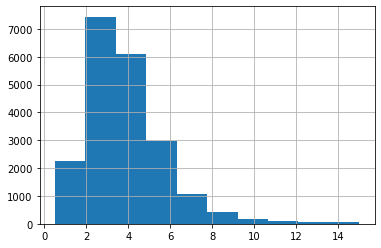

In [11]:
data.median_income.hist() #where 2=20k..., median seems to be b/w 1.5 to 6 and can be used for stratified sampling

### Performing Stratified Sampling

In [12]:
data['income_cat']=pd.cut(data['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

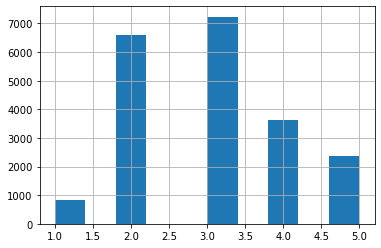

In [13]:
data.income_cat.hist()  #stratas

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_i,test_i in split.split(data,data['income_cat']):
    strat_train=data.loc[train_i]
    strat_test=data.loc[test_i]

In [16]:
strat_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [17]:
#now the new test data proportions generated using stratified will have proportions similar to full dataset

data['income_cat'].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
strat_test['income_cat'].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [19]:
strat_test.drop('income_cat',axis=1,inplace=True)   #removing income_cat
strat_train.drop('income_cat',axis=1,inplace=True)

## Exploring data

In [20]:
#crating copy of data so that original data be safe
df=strat_train.copy()

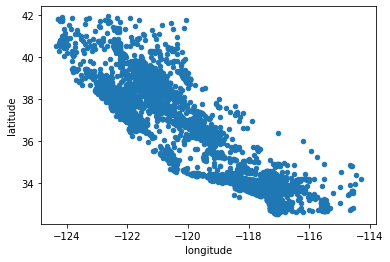

In [21]:
#since its a geographical data it is good idea to create a scatter of log and lat
df.plot(kind='scatter',x='longitude',y='latitude');    #seems california?

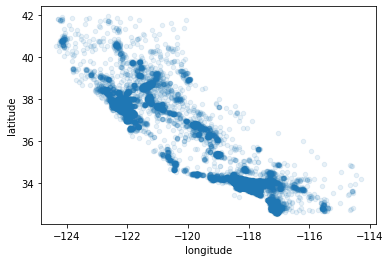

In [22]:
# now problem is to get an insight that where the density is high ,can be done by setting alpha to 0.1
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1);  

Now high density areas (Bay Areas) are clearly visible , creating an analogy with actual map:
<img src="https://www.google.com/maps/vt/data=JGLlWz07C-d9pBGGUgYvgawr__gId-vfii6fs41lnt8C6fSmebm_vVntaaLUh8sAX_PT4z80ra4UkgU84Sl7G38mJh_Ky53JNu00zj2Miry3NVpGGyr1N1hDrv87dsYkLlHEDMrrvb0LQdpuxn-JZyc0vJdIy3Ck_NxwmyDhsJJRawvG67-LeV1GLkbQHN--9gu3zVVr4eVnQGwmHcqrqAGSCNexaANym7_xCrJ9TxpNdd1yA0JXIPEuT_rwPR_HWopeZqHfrN8DX0rVgdrJku-GhxyEJFBg1giybwpeWr2v_KRxDd_azZobdUKs9EuBxS3XzPcVGW5T">

high density areas are los angeles, San diego,central valley(Sacramento,Fresno)

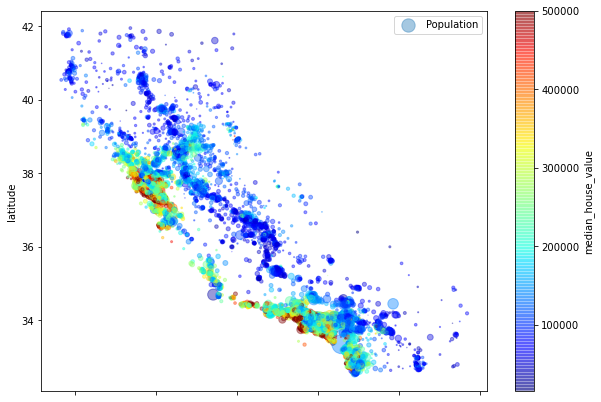

In [23]:
# Lets have a more closer insight along with regions having most polulation and prices 
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
       s=df["population"]/100,label="Population", #creates a circle on high populated areas
       figsize=(10,7),
       c="median_house_value",  #column to color plot with
       cmap=plt.get_cmap("jet"), #range of colors blue(low) red(high)
       colorbar=True);
plt.legend();

houses in the region with blue color are cheap and with red are expensive

In [24]:
#checking correlations 
df.corr()  #this method is used to compute std. correlation coffecient (also called Pearson's r)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


median_income,housing_median_age,total_rooms seems highly positively correlated with the meadian house value

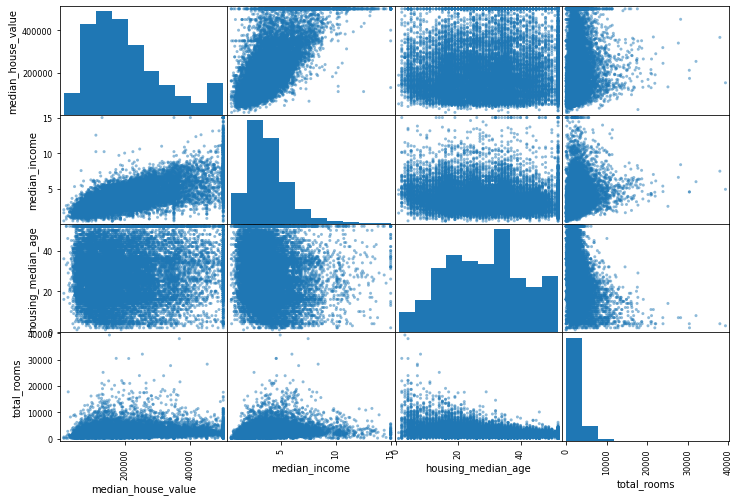

In [25]:
#using scatter matrix to plot these highly correlated values along each other
from pandas.plotting import scatter_matrix
main_attributes=['median_house_value','median_income','housing_median_age','total_rooms']
scatter_matrix(df[main_attributes],figsize=(12,8));

now this is the relation of each numerical attribute with each other , it plots a histogram dist for that same attribute

let look into the most promising attribute for predicting prices i.e. median_income

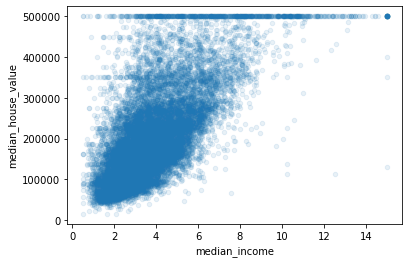

In [26]:
df.plot.scatter('median_income','median_house_value',alpha=0.1);

this plot reveals that the correlation is very strong as the trend is upward

### Performing some feature engineering

In [27]:

#bedrooms, polpulation and rooms are irrelevent unless we consider them per household
#so we'll add them as relevent features
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']
df['rooms_per_household']=df['total_rooms']/df['households']
corr_matrix=df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
#lets seperate our predictors and the labels
housing=strat_train.drop('median_house_value',axis=1)
housing_labels=strat_train["median_house_value"].copy()

## Data cleaning

In [29]:

#we can either delete the missing value rows from column or fill them by their respective mean or median
#method 1 of filling with medians we'll be using total bedrooms as this attribute was having the null values
#median=housing['total_bedrooms'].median() #we'll create this seperate variable as we're gonna use this value in future to fill missing values in test data any new data we're getting
#housing['total_bedrooms'].fillna(median,inplace=True)

In [30]:
#scikit learn provides us a handy utility to take care of the missing values i.e Simple Imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
#since the imputer requires only numerical data we'll drop our object based attribute
housing_nums=housing.drop('ocean_proximity',axis=1)
#now we'll fit this data to imputer the fit will find the medians of all the attributes and store it in .statistics_
imputer.fit(housing_nums)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

as in our current data we're only having missing values in ocean_proximity but as the data get updated we cannot guarantee that so we'll use imputer in our pipeline to ensure that no null values should exist while training

In [31]:
#now we can use transform method to generate the training set with filled missing values
x=imputer.transform(housing_nums) #it will return a numpy arry we can create a data frame
#sklearn also provides fit_transform which does both fit and transform at same time
housing_tr=pd.DataFrame(x,columns=housing_nums.columns,index=housing_nums.index)

In [32]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## Dealing Text categorical data

In [33]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [34]:
housing_cat_tmp=housing[['ocean_proximity']]
housing_cat_tmp.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [35]:
#since the data is categorical most of the ml algorithms prefer working with numerical data
#we'll use sklearn ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ordenc=OrdinalEncoder()
ordenc_cat=ordenc.fit_transform(housing_cat_tmp)
ordenc_cat[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

In [36]:
ordenc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

but with this approach seems goood with values having categories which do have some numerical meaning like bad,ok,good,excellent - 0,1,2,3
but in this case ocean proximity is'nt the type of data ordinal encoder seems fit for this we'll do onehot encoding which is perfect for this as each category is represented in 0 and 1 

In [37]:
from sklearn.preprocessing import OneHotEncoder
onehotenc=OneHotEncoder()
oneenc_cat=onehotenc.fit_transform(housing_cat_tmp)
oneenc_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
#the output of one hot encoding is a scipy sparse matrix
oneenc_cat.toarray() #to numpy array ,each row representing 1 for the category 

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [39]:
onehotenc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
cat_df=pd.DataFrame(oneenc_cat.toarray(),columns=onehotenc.categories_)

In [41]:
cat_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


### Feature Scaling

In [42]:
#most of the machine learning algorithms did'nt perform well when the data is not in same scale
# two ways to scale i.e min-max scaling(normalization) and standardization
#normalization scales the data to the specific range usually 0-1 i.e subtracting by min and dividing by the range(max-min)
#standardization is subtracting by mean and dividing by std deviation
#normalization can be achieved with MinMaxScalar and StandardScalar  

In [43]:
#Using standardscalar with pipeline to handle numeric data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('stdation',StandardScaler())
])

In [44]:
data=num_pipeline.fit_transform(housing_nums)

In [45]:
housing_prepared=pd.DataFrame(data,columns=housing_nums.columns,index=housing_nums.index)

In [46]:
housing_prepared.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Training Model


In [47]:
from sklearn.linear_model import LinearRegression

lrmodel=LinearRegression()
lrmodel.fit(housing_prepared,housing_labels);

In [48]:
lrmodel.predict(housing_prepared.iloc[:5])

array([207533.05517343, 322908.00664981, 205636.93169928,  75429.96006053,
       188528.17569525])

In [49]:
housing_labels.iloc[:5]

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [68]:
# Finding Root Mean Squared Error of train set

from sklearn.metrics import mean_squared_error
housing_predict=lrmodel.predict(housing_prepared)
np.sqrt(mean_squared_error(housing_labels,housing_predict))

69958.39940326138

seems our model was underfitting 

In [52]:
# Lets try out different model and check the rmse metric now
from sklearn.tree import DecisionTreeRegressor
dtmodel=DecisionTreeRegressor()
dtmodel.fit(housing_prepared,housing_labels)
housing_pred=dtmodel.predict(housing_prepared)
np.sqrt(mean_squared_error(housing_labels,housing_pred))

NameError: name 'mean_squared_error' is not defined

now our models seems to badly overfit

**Evaluation with Cross Validation**

now we'll take the training set and take 10 folds where validation is done on 1 fold and training on other 9,
since the evaluation of decision tree model requires these special methods

In [53]:
def display_scores(scores):
    print(f"root means:{scores}")
    print(f"mean score:{scores.mean()}")
    print(f"std dev:{scores.std()}")

In [54]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dtmodel,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

rmse_score=np.sqrt(-scores)

In [55]:
#tree scores
display_scores(rmse_score)

root means:[67154.47386316 68941.08793992 72581.67053354 70922.62183099
 69200.33566221 71276.28347488 71196.73152557 69158.11794408
 69755.32125432 71112.60689414]
mean score:70129.9250922817
std dev:1492.4080651208812


In [56]:
# lr scores
scores=cross_val_score(lrmodel,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lrscores=np.sqrt(-scores)
display_scores(lrscores)

root means:[68231.8739688  68498.24540696 69602.95540263 74953.53757784
 68963.39008985 72142.21999409 66587.92731065 69747.54809465
 73515.43621253 68938.5043212 ]
mean score:70118.16383792047
std dev:2465.599156242604


In [57]:
#using a random forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel=RandomForestRegressor()
rfmodel.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [58]:
scores=cross_val_score(rfmodel,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rfscores=np.sqrt(-scores)
display_scores(rfscores)

root means:[48058.08091313 46666.97596747 49494.98354831 51465.6193475
 49902.00268206 52649.81607326 49400.09870936 51114.18002102
 51945.13173201 50340.78486193]
mean score:50103.76738560548
std dev:1723.588787315382


### Using param search

In [84]:
## Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

rfmodel=RandomForestRegressor()
grid_search=GridSearchCV(rfmodel,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [88]:
# Randomized Search

from sklearn.model_selection import RandomizedSearchCV
rand_search=RandomizedSearchCV(rfmodel,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

rand_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
rand_search.best_params_

{'n_estimators': 30, 'max_features': 6}

In [90]:
scores=cross_val_score(grid_search,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
gsscores=np.sqrt(-scores)
display_scores(gsscores)

root means:[48244.29299254 47242.61937828 49528.7351629  51146.52848243
 49128.66523039 52771.01739026 49408.94803971 51285.86432253
 52164.84177945 51265.67462893]
mean score:50218.718740741744
std dev:1687.3919980619953


In [91]:
scores=cross_val_score(rand_search,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rsscores=np.sqrt(-scores)
display_scores(rsscores)

root means:[48540.85329293 50418.3122655  49363.13378973 52884.22164745
 49735.89108668 53481.73333023 49653.84364491 50945.31783496
 52671.4801733  50292.52709483]
mean score:50798.73141605091
std dev:1583.564256525548


### 95% confidence interval for the generalization error using scipy.stats.t.interval()

In [64]:
from scipy import stats
from sklearn.metrics import mean_squared_error
confidence=0.95
preds=rfmodel.predict(housing_prepared)
se=(preds - housing_labels) ** 2
np.sqrt(stats.t.interval(confidence,len(se)-1,
       loc=se.mean(),scale=stats.sem(se)))

array([18118.55411362, 18971.74303098])